In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn
from sklearn import decomposition
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering


#METHODOLOGY

In [2]:
#Load data
df = pd.read_csv('simulated_health_wellness_data.csv')
df.head(5)

,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI
0,34.967142,5,7.618856,2,33.068556
1,28.617357,8,4.105473,7,27.267672
2,36.476885,4,6.024123,1,23.779217
3,45.230299,1,8.565319,8,29.820436
4,27.658466,3,8.301648,3,30.947352


##Data Exploration




In [3]:
#Instances & Features
df.shape

(200, 5)

In [4]:
#Check for missing values
df.isnull().sum()

,0
Exercise_Time_Min,0
Healthy_Meals_Per_Day,0
Sleep_Hours_Per_Night,0
Stress_Level,0
BMI,0


In [5]:
#Count & Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exercise_Time_Min      200 non-null    float64
 1   Healthy_Meals_Per_Day  200 non-null    int64  
 2   Sleep_Hours_Per_Night  200 non-null    float64
 3   Stress_Level           200 non-null    int64  
 4   BMI                    200 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 7.9 KB


In [6]:
#Statistical Summary
df.describe().round(2)
#(Nwanganga, 2022)

,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI
count,200.00,200.00,200.00,200.00,200.00
mean,29.59,2.88,6.93,5.00,25.15
std,9.31,1.82,1.42,2.61,5.07
min,3.80,0.00,1.78,1.00,12.50
25%,22.95,2.00,5.97,3.00,21.46
50%,29.96,3.00,6.97,5.00,25.16
75%,35.01,4.00,7.89,7.00,28.01
max,57.20,9.00,10.71,9.00,37.90


<ipython-input-7-ceb922c0c3fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Healthy_Meals_Per_Day', y='BMI', palette='pastel')


Text(0.5, 1.0, 'Figure 1. Relationship Between Healthy Meals Per Day and BMI')

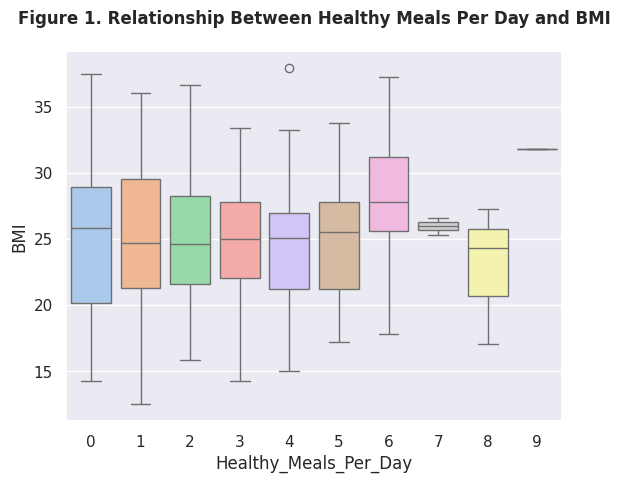

In [7]:
#Data visualization: Box plots
ax = sns.boxplot(data=df, x='Healthy_Meals_Per_Day', y='BMI', palette='pastel')
plt.title('Figure 1. Relationship Between Healthy Meals Per Day and BMI',
    fontweight='bold', loc='center', pad=20)
#(Nwanganga, 2022)

<ipython-input-8-4fde1e526242>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Healthy_Meals_Per_Day', y='Exercise_Time_Min', palette='pastel')


Text(0.5, 1.0, 'Figure 2. Relationship Between Exercise Time and Healthy Meals Per Day')

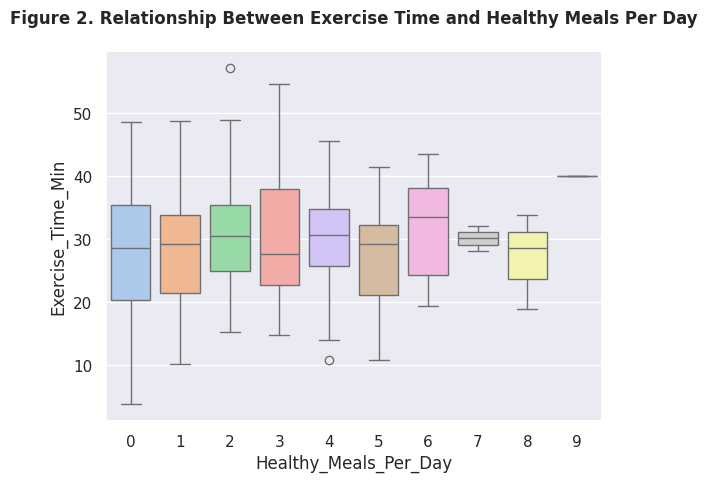

In [8]:
ax = sns.boxplot(data=df, x='Healthy_Meals_Per_Day', y='Exercise_Time_Min', palette='pastel')
plt.title('Figure 2. Relationship Between Exercise Time and Healthy Meals Per Day', fontweight='bold', loc='center', pad=20)

<ipython-input-9-c0bbe9cfcda7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Healthy_Meals_Per_Day', y='Stress_Level', palette='pastel')


Text(0.5, 1.0, 'Figure 3. Stress Level and Healthy Meals Per Day')

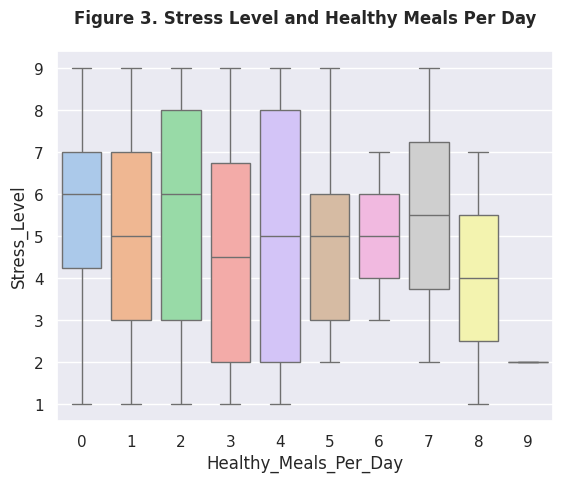

In [9]:
ax = sns.boxplot(data=df, x='Healthy_Meals_Per_Day', y='Stress_Level', palette='pastel')
plt.title('Figure 3. Stress Level and Healthy Meals Per Day', fontweight='bold', loc='center', pad=20)

<ipython-input-10-70026551dc65>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Healthy_Meals_Per_Day', y='Sleep_Hours_Per_Night', palette='pastel')


Text(0.5, 1.0, 'Figure 4. Relationship between Sleep Hours and Healthy Meals Per Day')

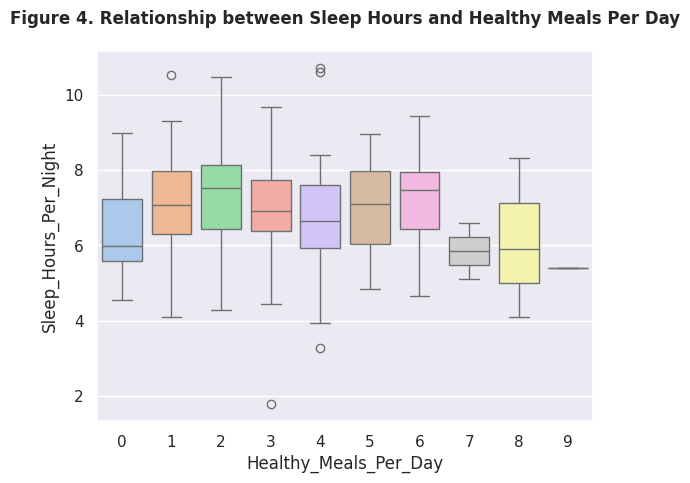

In [10]:
ax = sns.boxplot(data=df, x='Healthy_Meals_Per_Day', y='Sleep_Hours_Per_Night', palette='pastel')
plt.title('Figure 4. Relationship between Sleep Hours and Healthy Meals Per Day', fontweight='bold', loc='center', pad=20)

Text(0.5, 1.0, 'Figure 5. Relationship Between Sleep Hours and Healthy Meals Per Day')

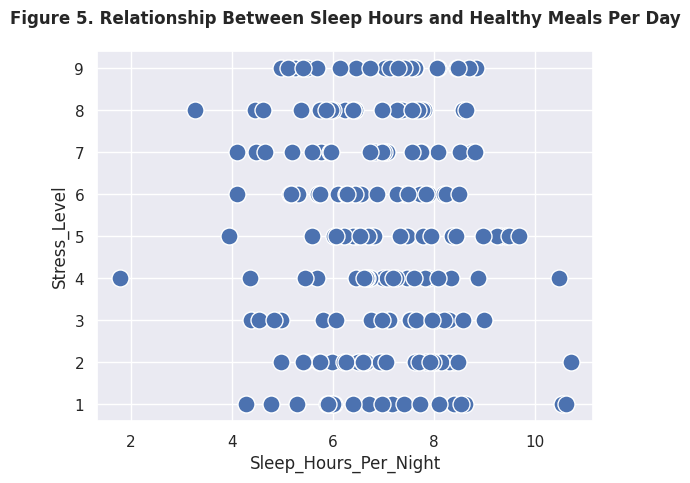

In [11]:
#Data visualization: Scatter plots
ax = sns.scatterplot(data=df, x='Sleep_Hours_Per_Night', y='Stress_Level', s=150)
plt.title('Figure 5. Relationship Between Sleep Hours and Healthy Meals Per Day', fontweight='bold', loc='center', pad=20)
#(Nwanganga, 2022)

Text(0.5, 1.0, 'Figure 6. Relationship Between Healthy Meals Per Day and BMI')

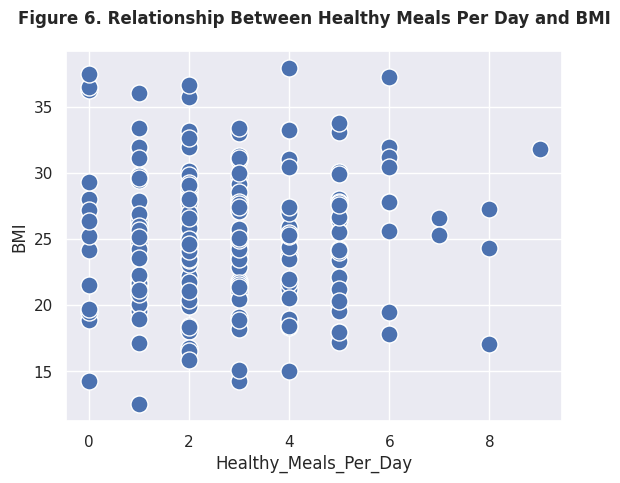

In [12]:
ax = sns.scatterplot(data=df, x='Healthy_Meals_Per_Day', y='BMI', s=150)
plt.title('Figure 6. Relationship Between Healthy Meals Per Day and BMI', fontweight='bold', loc='center', pad=20)


Text(0.5, 1.0, 'Figure 7. Relationship Between Stress Level and BMI')

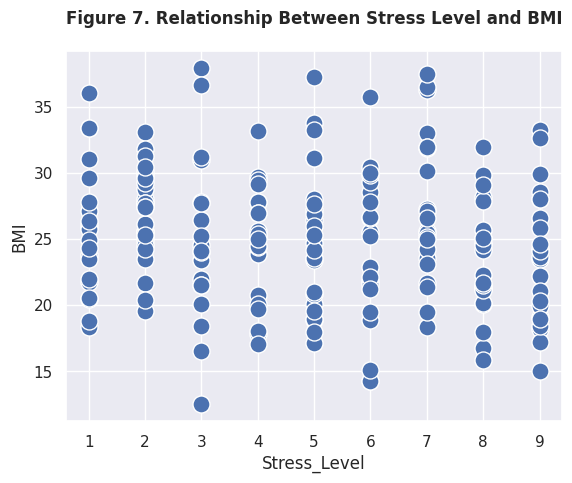

In [13]:
ax = sns.scatterplot(data=df, x='Stress_Level', y='BMI', s=150)
plt.title('Figure 7. Relationship Between Stress Level and BMI', fontweight='bold', loc='center', pad=20)

Text(0.5, 1.0, 'Figure 8. Relationship Between Exercise Time and Sleep Hours')

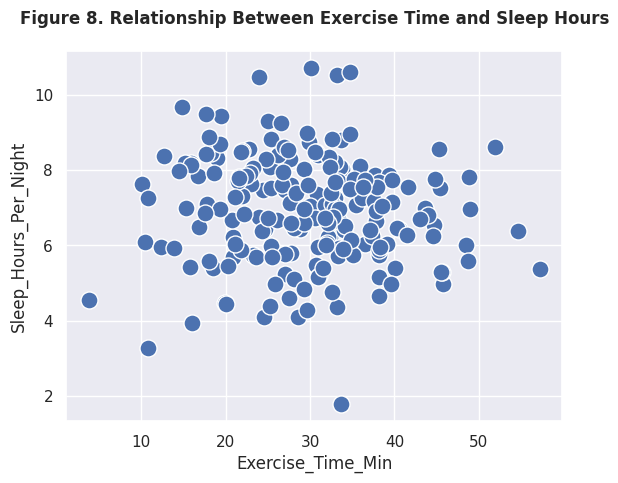

In [14]:
ax = sns.scatterplot(data=df, x='Exercise_Time_Min', y='Sleep_Hours_Per_Night', s=150)
plt.title('Figure 8. Relationship Between Exercise Time and Sleep Hours', fontweight='bold', loc='center', pad=20)
#Possible clusters

Text(0.5, 1.0, 'Figure 9. Relationship Between Exercise Time and BMI')

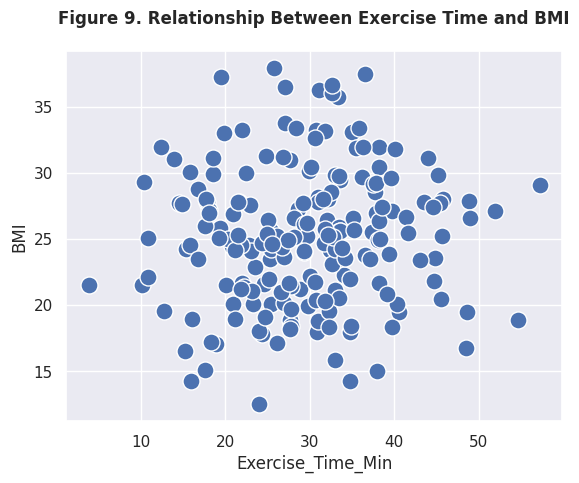

In [15]:
ax = sns.scatterplot(data=df, x='Exercise_Time_Min', y='BMI', s=150)
plt.title('Figure 9. Relationship Between Exercise Time and BMI', fontweight='bold', loc='center', pad=20)
#Possible clusters

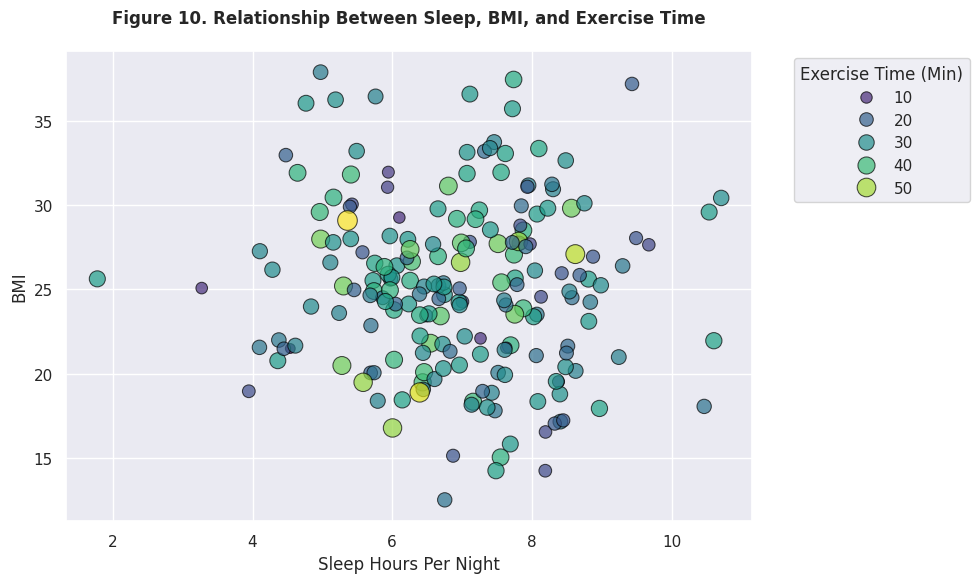

In [47]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='Sleep_Hours_Per_Night', y='BMI', hue='Exercise_Time_Min', palette='viridis', size='Exercise_Time_Min', sizes=(50, 200), alpha=0.7, edgecolor='black', s=150)
plt.title('Figure 10. Relationship Between Sleep, BMI, and Exercise Time', fontweight='bold', pad=20)
plt.xlabel('Sleep Hours Per Night')
plt.ylabel('BMI')
plt.legend(title='Exercise Time (Min)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

DISCUSSION

Based off the EDA, I believe that possible clusters can be derived here from the BMI, Excerise_Time_min, and Sleep_Hours_Per_Night scatter plot. It is also an educated assumption that more time spent excersicing and sleeping should result in a lower BMI and vice versa.

##MODEL DEVELOPMENT

Preprocessing model development

In [17]:
#Prepare the data
df[['Exercise_Time_Min', 'BMI', 'Sleep_Hours_Per_Night']].describe().round(2)

,Exercise_Time_Min,BMI,Sleep_Hours_Per_Night
count,200.00,200.00,200.00
mean,29.59,25.15,6.93
std,9.31,5.07,1.42
min,3.80,12.50,1.78
25%,22.95,21.46,5.97
50%,29.96,25.16,6.97
75%,35.01,28.01,7.89
max,57.20,37.90,10.71


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
df_scaled = scaler.fit_transform(df[['Exercise_Time_Min', 'BMI', 'Sleep_Hours_Per_Night']])
df_scaled = pd.DataFrame(df_scaled, columns = ['Exercise_Time_Min', 'BMI', 'Sleep_Hours_Per_Night'])
df_scaled.describe().round(2)
#(Nwanganga, 2022)

,Exercise_Time_Min,BMI,Sleep_Hours_Per_Night
count,200.00,200.00,200.00
mean,-0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-2.78,-2.50,-3.63
25%,-0.72,-0.73,-0.68
50%,0.04,0.00,0.03
75%,0.58,0.57,0.67
max,2.97,2.52,2.66


In [55]:
#Create clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_init = 25, random_state = 1234)

In [56]:
km.fit(df_scaled)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [57]:
km.labels_

array([1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 0, 2, 2,
       2, 1, 2, 0, 0, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0,
       1, 0, 0, 2, 1, 0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1,
       2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0,
       2, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 1, 1, 2,
       1, 2, 2, 0, 2, 1, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 2, 2,
       2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 2, 0,
       1, 1], dtype=int32)

In [58]:
km.inertia_
#WCSS

691.154293683369

In [59]:
#Evaluate & Visualize clusters
pd.Series(km.labels_).value_counts().sort_index()

,count
0,62
1,66
2,72


In [60]:
km.cluster_centers_

array([[ 0.93384521, -0.01770704, -0.57950381,  1.87096774,  0.88278757,
        -0.4717904 ],
       [-0.2142392 ,  0.86093086,  0.55385249,  3.46969697,  0.03595216,
         1.02941587],
       [-0.60775856, -0.77393889, -0.00868095,  0.68055556, -0.79313433,
        -0.53736726]])

In [63]:

cluster_centers = pd.DataFrame(km.cluster_centers_[:, :3], columns = ['Exercise_Time_Min', 'BMI', 'Sleep_Hours_Per_Night'])
cluster_centers

,Exercise_Time_Min,BMI,Sleep_Hours_Per_Night
0,0.933845,-0.017707,-0.579504
1,-0.214239,0.860931,0.553852
2,-0.607759,-0.773939,-0.008681


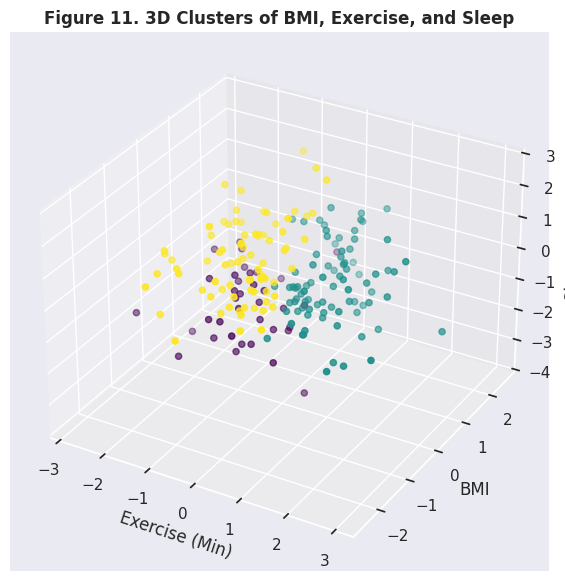

In [86]:
# K-Means with 3 features
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled[['Exercise_Time_Min', 'BMI', 'Sleep_Hours_Per_Night']])
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_scaled['Exercise_Time_Min'], df_scaled['BMI'], df_scaled['Sleep_Hours_Per_Night'], c=df_scaled['Cluster'], cmap='viridis')
ax.set_xlabel('Exercise (Min)')
ax.set_ylabel('BMI')
ax.set_zlabel('Sleep (Hrs)')
plt.title('Figure 11. 3D Clusters of BMI, Exercise, and Sleep', fontweight='bold')
plt.show()

##MODEL EVALUATIONS

Within-Cluster Sum of Squares

Text(0.5, 1.0, 'Figure 12. Within-Cluster Sum of Squares')

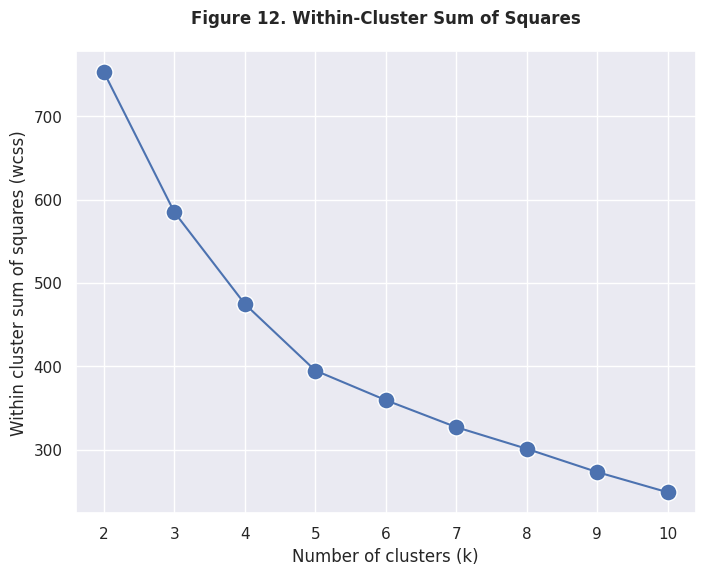

In [87]:
#Evaluate the right number of clusters
wcss = []
for k in range(2,11):
    km=KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(df_scaled)
    wcss.append(km.inertia_)

wcss_series=pd.Series(wcss, index=range(2, 11))
plt.figure(figsize=(8, 6))
ax=sns.lineplot(y=wcss_series, x=wcss_series.index)
ax=sns.scatterplot(y=wcss_series, x=wcss_series.index, s=150)
ax=ax.set(xlabel='Number of clusters (k)', ylabel='Within cluster sum of squares (wcss)')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
plt.title('Figure 12. Within-Cluster Sum of Squares', fontweight='bold', loc='center', pad=20)
#(Nwanganga, 2022)

We observe the elbow test indicating that the WCSS is no longer significantly decreasing at k=5. Now, let's verify this with the Silhouette score test.

Silhouette Score

Silhouette Scores for k=2 to k=10:
2    0.313
3    0.299
4    0.317
5    0.298
6    0.303
7    0.287
8    0.266
9    0.282
10   0.289


Text(0.5, 1.0, 'Figure 13. Silhouette score')

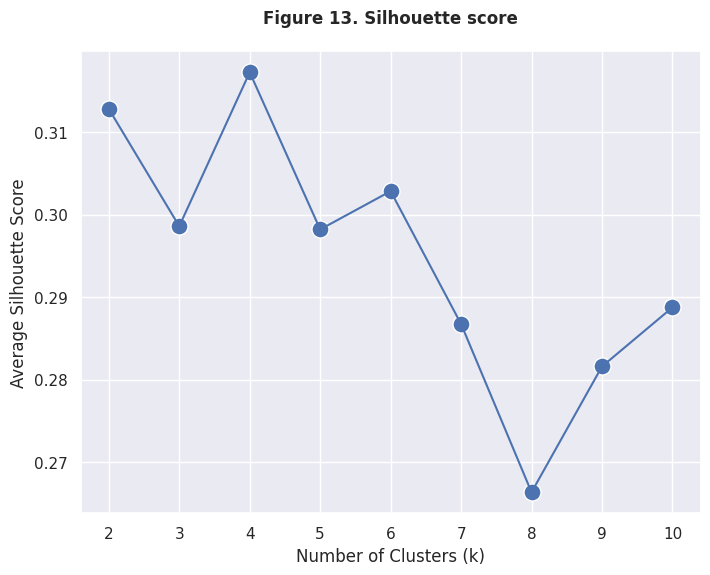

In [88]:
silhouette = []
for k in range (2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(df_scaled)
    silhouette.append(silhouette_score(df_scaled, km.labels_))

silhouette_series = pd.Series(silhouette, index= range(2,11))
print("Silhouette Scores for k=2 to k=10:")
print(silhouette_series.to_string(float_format="%.3f"))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y=silhouette_series, x=silhouette_series.index)
ax = sns.scatterplot(y=silhouette_series, x=silhouette_series.index, s=150)
ax = ax.set(xlabel='Number of Clusters (k)', ylabel='Average Silhouette Score')
plt.title('Figure 13. Silhouette score', fontweight='bold', loc='center', pad=20)
#(Nwanganga, 2022)

In [99]:
#The Silhouette score indicates that k=4...mmmm what does this mean?
#Let's interpret the results; instead of k=3, we'll do k=5.
km = KMeans (n_clusters = 5, n_init = 25, random_state = 1234)
km.fit(df_scaled)

KMeans(n_clusters=5, n_init=25, random_state=1234)

In [100]:
cluster_centers = pd.DataFrame(km.cluster_centers_[:, :3], columns = ['Exercise_Time_Min', 'BMI', 'Sleep_Hours_Per_Night'])
# Change the slice to [:3] to select only the first 3 columns of the cluster centers, corresponding to the 3 features used in the model.

##RESULT

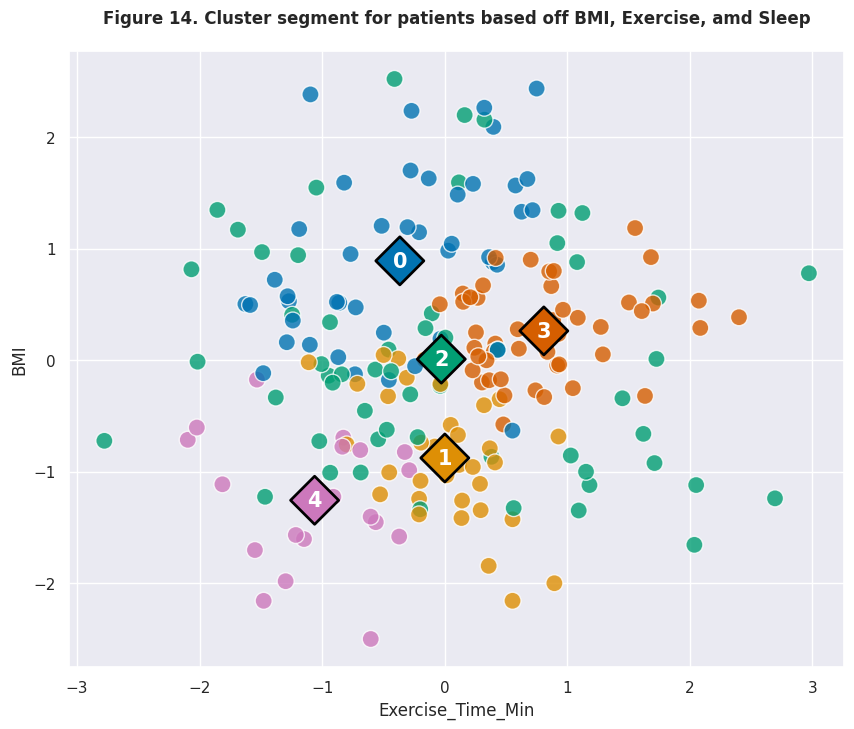

In [101]:
plt.figure(figsize = (10,8))
ax=sns.scatterplot(data=df_scaled, x='Exercise_Time_Min', y='BMI', hue=km.labels_, palette='colorblind', alpha=0.8, s=150, legend=False)
#Plot Centroids
ax = sns.scatterplot(data = cluster_centers, x='Exercise_Time_Min', y='BMI', hue=cluster_centers.index, palette='colorblind', s=600, marker='D', edgecolor='black', legend=False)
#Add labels
for i in range(len(cluster_centers)):
    plt.text(x=cluster_centers.Exercise_Time_Min[i], y=cluster_centers.BMI[i], s=i, horizontalalignment='center', verticalalignment='center', size=15, weight='bold', color='white')
    plt.title('Figure 14. Cluster segment for patients based off BMI, Exercise, amd Sleep', fontweight='bold', loc='center', pad=20)
#(Nwanganga, 2022)

In [102]:
# Segment original data into 5 clusters and analyze the features and their characteristics
df['Cluster'] = km.labels_.tolist()
df.head(5)

,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI,Cluster
0,34.967142,5,7.618856,2,33.068556,0
1,28.617357,8,4.105473,7,27.267672,2
2,36.476885,4,6.024123,1,23.779217,3
3,45.230299,1,8.565319,8,29.820436,3
4,27.658466,3,8.301648,3,30.947352,0


In [103]:
df.agg({'Exercise_Time_Min':'mean', 'Healthy_Meals_Per_Day':'mean', 'Sleep_Hours_Per_Night': 'mean', 'Stress_Level': 'mean', 'BMI': 'mean'}).round(2)

,0
Exercise_Time_Min,29.59
Healthy_Meals_Per_Day,2.88
Sleep_Hours_Per_Night,6.93
Stress_Level,5.00
BMI,25.15


In [104]:
df.groupby('Cluster').agg({'Exercise_Time_Min':'mean', 'Healthy_Meals_Per_Day':'mean', 'Sleep_Hours_Per_Night': 'mean', 'Stress_Level': 'mean', 'BMI': 'mean'}).round(2)

,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI
Cluster,,,,,
0,26.20,2.80,8.26,4.20,29.65
1,29.61,2.97,7.45,5.85,20.71
2,29.34,2.91,5.37,5.38,25.19
3,37.11,2.94,6.71,4.47,26.47
4,19.74,2.63,8.09,5.58,18.79


##MODEL COMPARISON WITH PCA

In [105]:
#PCA
df_scaled['Cluster'] = df['Cluster']
df_scaled.head()

,Exercise_Time_Min,BMI,Sleep_Hours_Per_Night,Cluster,PCA_Components_1,PCA_Components_2
0,0.578767,1.565523,0.482957,0,0.947229,1.446232
1,-0.104981,0.418669,-1.993156,2,1.308423,-0.963140
2,0.741336,-0.271010,-0.640956,3,0.660511,-0.686159
3,1.683908,0.923359,1.149993,3,0.872688,1.292770
4,-0.208235,1.146154,0.964166,0,-0.035287,1.510332


In [106]:
X_dim_reduction = df_scaled[['Exercise_Time_Min', 'BMI', 'Sleep_Hours_Per_Night']]

In [107]:
scaler_dim_reduction = StandardScaler()
X_scaled_dim_reduction = scaler_dim_reduction.fit_transform(X_dim_reduction)

In [108]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled_dim_reduction)

In [109]:
df_scaled['PCA_Components_1'] = X_pca[:, 0]
df_scaled['PCA_Components_2'] = X_pca[:, 1]
df_scaled.head()

,Exercise_Time_Min,BMI,Sleep_Hours_Per_Night,Cluster,PCA_Components_1,PCA_Components_2
0,0.578767,1.565523,0.482957,0,0.947229,1.446232
1,-0.104981,0.418669,-1.993156,2,1.308423,-0.963140
2,0.741336,-0.271010,-0.640956,3,0.660511,-0.686159
3,1.683908,0.923359,1.149993,3,0.872688,1.292770
4,-0.208235,1.146154,0.964166,0,-0.035287,1.510332


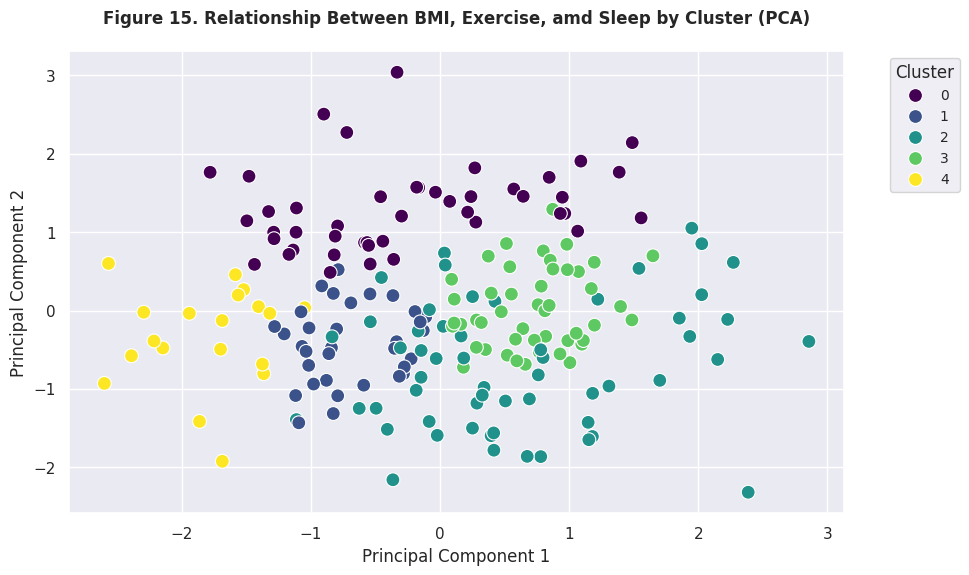

In [110]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA_Components_1', y='PCA_Components_2',hue='Cluster',
    palette='viridis', data=df_scaled, s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Figure 15. Relationship Between BMI, Exercise, amd Sleep by Cluster (PCA)', fontweight='bold', loc='center', pad=20)
plt.legend(title='Cluster', fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
#(Oyewusi, 2025)

In [111]:
pca.explained_variance_ratio_

array([0.37769104, 0.31422682])

In [112]:
pca.explained_variance_ratio_.sum()

np.float64(0.6919178577494451)

In [113]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=['Exercise_Time_Min', 'BMI', 'Sleep_Hours_Per_Night'])
print(loadings)

                            PC1       PC2
Exercise_Time_Min      0.601709 -0.089359
BMI                    0.558695  0.757243
Sleep_Hours_Per_Night -0.570795  0.646992


In [114]:
# Fit K-Means on PCA components
km_pca = KMeans(n_clusters=6, n_init=25, random_state=1234)
km_pca.fit(df_scaled[['PCA_Components_1', 'PCA_Components_2']])
pca_labels = km_pca.labels_

pca_score = silhouette_score(df_scaled[['PCA_Components_1', 'PCA_Components_2']], pca_labels)
print(f'Silhouette Score (PCA): {pca_score:.3f}')
#(Oyewusi, 2025)

Silhouette Score (PCA): 0.346
